# Supervised Machine Learning Project

~ Problem Statement 1:
---------------------
Fyntra is the largest online clothing company in USA. It sells clothing online, but they also have in-store style and clothing advice sessions. Customers come into the store, have sessions/meetings with a personal stylist, then can go home and order eitheron a mobile app or website for the clothes they want.  

Company wants to decide whether to focus the effort on mobile app experience or its website. As a drastic measure it is also evaluating to shut down the website.

You as a ML expert in the team will help the company make the right decision

Tasks to be performed:
Increase in profits as the focus on the optimal sales channel will result into the higher top line and the higher bottom line

1.Compute --    Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.  Is there a correlation?

2.Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?

3.Compute --    Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

4.Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

5.Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?

6.Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?

7.What is the value of Root Mean Squared Error?

8.Based on coefficients interpret company should focus more on their mobile app or on their website


In [6]:
#importing all the neccesary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [5]:
#load the dataset
df = pd.read_csv("FyntraCustomerData.csv")
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
#Visualizations
print("Visualizations:")
print("-"*15)

Visualizations:
---------------


## 1.  Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns

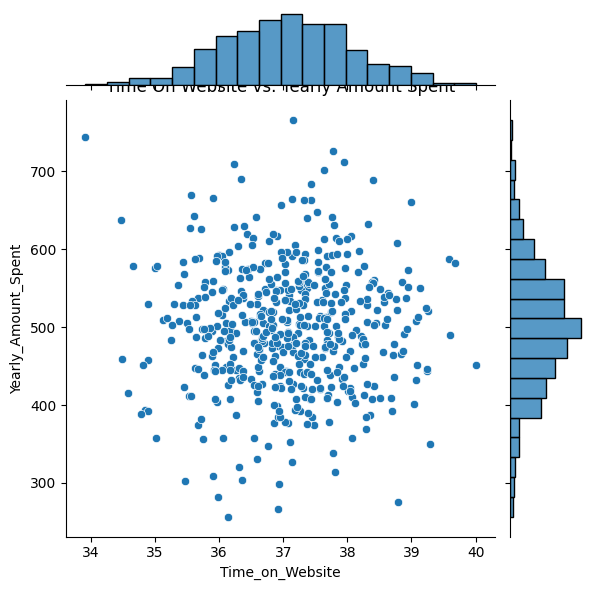

In [9]:
sns.jointplot(x="Time_on_Website", y="Yearly_Amount_Spent", data= df)
plt.title("Time On Website vs. Yearly Amount Spent")
plt.show()

## 2. Use seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent.

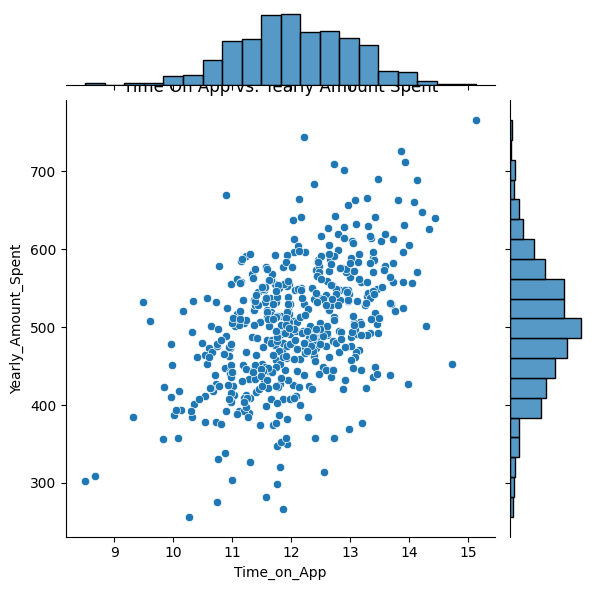

In [10]:
sns.jointplot(x="Time_on_App", y="Yearly_Amount_Spent", data= df)
plt.title("Time On App vs. Yearly Amount Spent")
plt.show()

## 3.Explore types of relationships across the entire data set using pairplot. Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

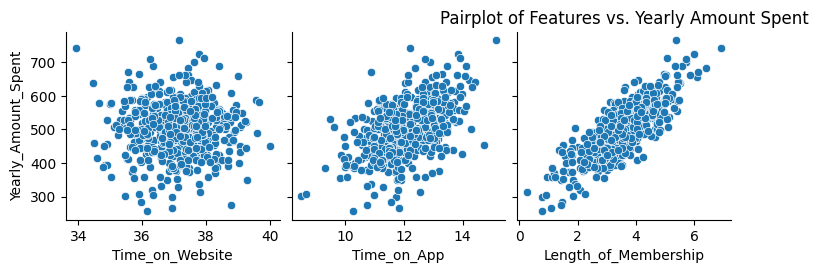

In [11]:
sns.pairplot(df, x_vars =["Time_on_Website", "Time_on_App","Length_of_Membership"], y_vars = "Yearly_Amount_Spent")
plt.title("Pairplot of Features vs. Yearly Amount Spent")
plt.show()

## 4. Create linear model plot of Length of Membership and Yearly Amount Spent.

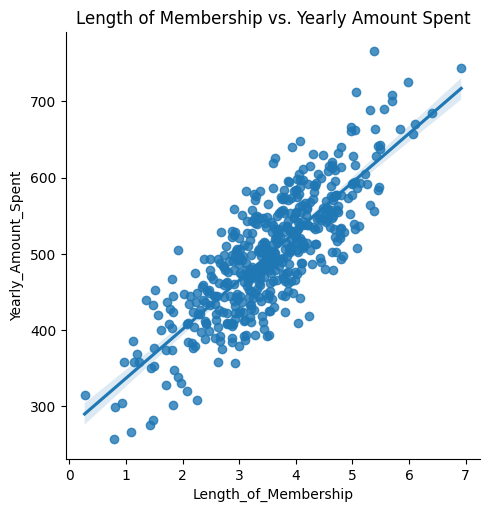

In [12]:
sns.lmplot(x="Length_of_Membership", y="Yearly_Amount_Spent", data= df)
plt.title("Length of Membership vs. Yearly Amount Spent")
plt.show()

## 5. Train and Test the data and answer multiple questions

In [13]:
print("\n Model Training and Evaluation:")
print("-"*31)


 Model Training and Evaluation:
-------------------------------


In [14]:
from sklearn.model_selection import train_test_split
X = df[["Time_on_Website", "Time_on_App", "Length_of_Membership"]]
y = df[["Yearly_Amount_Spent"]]
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=85)

#Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
#Coefficients of the model
print("Coefficients:", model.coef_)

Coefficients: [[-2.82739778e-02  3.85899020e+01  6.40900010e+01]]


In [15]:
#Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Predict the data and do a scatter plot.

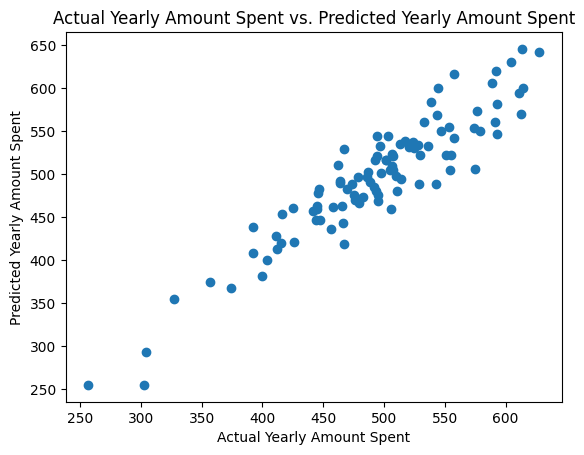

In [16]:
#Create a Scatter plot
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual Yearly Amount Spent vs. Predicted Yearly Amount Spent")
plt.show()

## 7.What is the value of Root Mean Squared Error

In [17]:
rmse = mean_squared_error(y_test, y_pred,)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 727.22


## 8.Based on coefficients interpret company should focus more on their mobile app or on their website

In [18]:
print("\nCoefficients:")
print("-"*13)
coefficients = model.coef_  
print(f"Coefficients:{coefficients}")


Coefficients:
-------------
Coefficients:[[-2.82739778e-02  3.85899020e+01  6.40900010e+01]]


In [20]:
from sklearn.linear_model import LinearRegression
X = df[['Time_on_Website', 'Time_on_App']]
y = df['Yearly_Amount_Spent']
model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print("-"*13)
print(coefficients)


Coefficients:
-------------
                 Coefficient
Time_on_Website    -3.459811
Time_on_App        40.124205


In [23]:
time_on_app_coef = coefficients.loc["Time_on_App", "Coefficient"]
time_on_website_coef = coefficients.loc["Time_on_Website", "Coefficient"]

In [25]:

if abs(time_on_app_coef) > abs(time_on_website_coef):
    print("The company should focus more on the mobile app.")
else:
    print("The company should focus more on the website")

The company should focus more on the mobile app.
